In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## Models
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

# Print last updated
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")


Notebook last updated: 2025-07-29 16:52:17.552368



In [2]:
data = pd.read_csv("Multiclass Diabetes Dataset.csv")

In [3]:
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [4]:
data.isna().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64

In [5]:
data.Class.value_counts()

Class
2    128
0     96
1     40
Name: count, dtype: int64

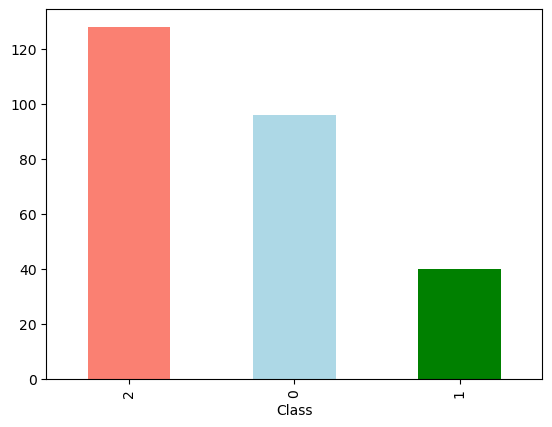

In [6]:
data.Class.value_counts().plot(kind="bar", color=["salmon", "lightblue","green"]);
plt.show()

In [7]:
data.Gender.value_counts()

Gender
1    144
0    120
Name: count, dtype: int64

In [8]:
pd.crosstab(data.Class, data.Gender)

Gender,0,1
Class,,
0,58,38
1,13,27
2,49,79


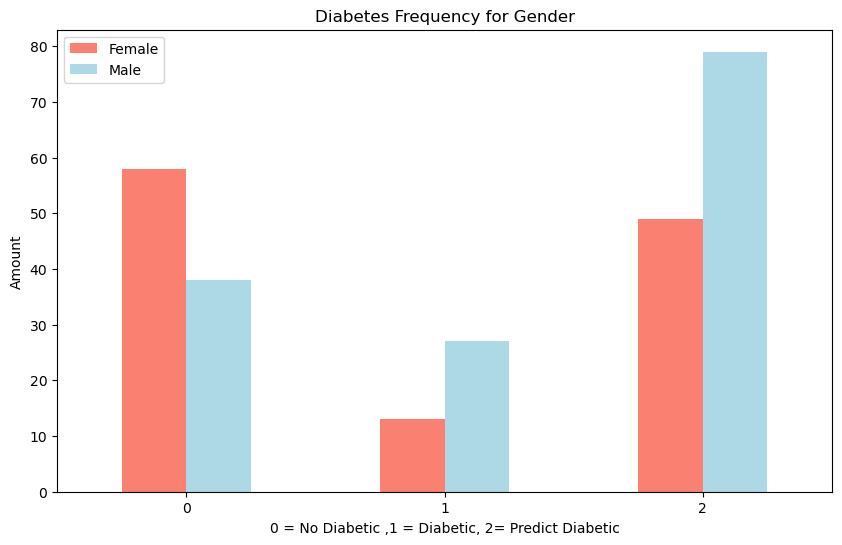

In [9]:
pd.crosstab(data.Class, data.Gender).plot(kind = "bar", figsize = (10,6), color = ["salmon", "lightblue"]);
plt.title("Diabetes Frequency for Gender")
plt.xlabel("0 = No Diabetic ,1 = Diabetic, 2= Predict Diabetic")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);
plt.show();

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [11]:
data.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


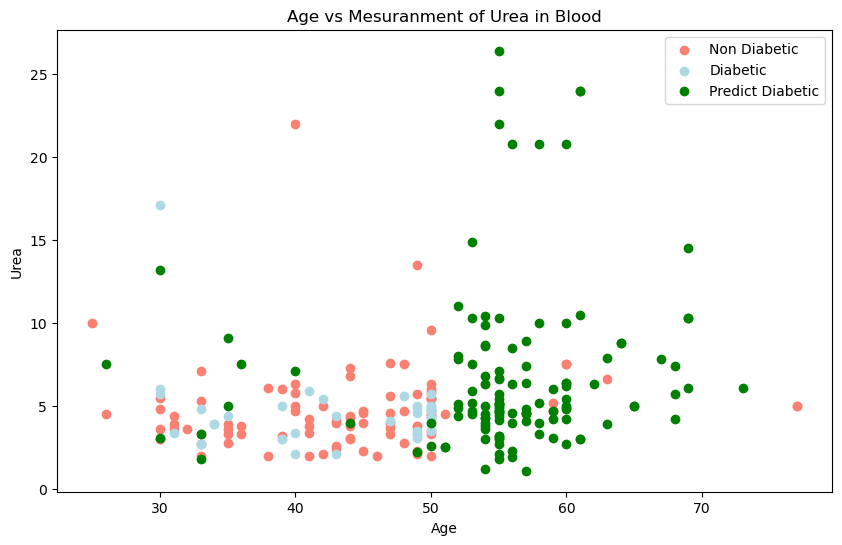

In [12]:
plt.figure(figsize =(10,6))
plt.scatter(data.AGE[data.Class == 0],
            data.Urea[data.Class == 0],
            c = "salmon")

plt.scatter(data.AGE[data.Class == 1],
            data.Urea[data.Class == 1],
            c = "lightblue")
plt.scatter(data.AGE[data.Class == 2],
            data.Urea[data.Class == 2],
            c = "green")
plt.title("Age vs Mesuranment of Urea in Blood")
plt.xlabel("Age")
plt.ylabel("Urea")
plt.legend(["Non Diabetic", "Diabetic", "Predict Diabetic"])
plt.show();

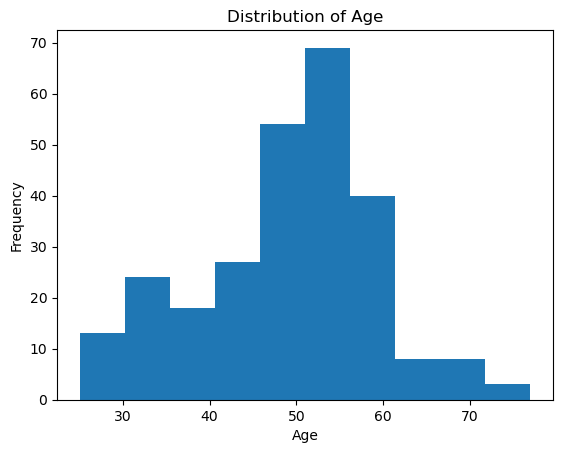

In [13]:
data.AGE.plot.hist();
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

In [14]:
pd.crosstab(data.HbA1c, data.Class)

Class,0,1,2
HbA1c,,,
0.9,3,0,0
3.7,1,0,1
4.0,20,0,2
4.1,6,0,0
4.2,4,0,0
...,...,...,...
12.9,0,0,1
13.2,0,0,1
13.7,0,0,1


In [15]:
data.corr()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
Gender,1.000000,0.143539,0.137249,0.170363,0.158350,0.025585,0.151293,-0.170715,0.023658,0.172111,0.137695,0.196158
AGE,0.143539,1.000000,0.201437,0.181714,0.446522,0.042347,0.216292,-0.074133,-0.018473,0.021822,0.553619,0.514331
Urea,0.137249,0.201437,1.000000,0.737770,0.139824,0.035962,0.165082,-0.078677,0.015097,-0.002175,0.241978,0.232363
Cr,0.170363,0.181714,0.737770,1.000000,0.113639,0.002475,0.168173,-0.015508,0.046571,-0.002497,0.254953,0.209028
HbA1c,0.158350,0.446522,0.139824,0.113639,1.000000,0.250896,0.218956,0.005604,-0.105121,0.144054,0.614643,0.771993
Chol,0.025585,0.042347,0.035962,0.002475,0.250896,1.000000,0.265536,0.044228,0.435670,0.110721,0.175445,0.262123
TG,0.151293,0.216292,0.165082,0.168173,0.218956,0.265536,1.000000,-0.081876,0.119850,0.199193,0.297110,0.313029
HDL,-0.170715,-0.074133,-0.078677,-0.015508,0.005604,0.044228,-0.081876,1.000000,-0.141959,-0.081158,0.044538,-0.029850
LDL,0.023658,-0.018473,0.015097,0.046571,-0.105121,0.435670,0.119850,-0.141959,1.000000,0.057781,-0.059192,-0.047529
VLDL,0.172111,0.021822,-0.002175,-0.002497,0.144054,0.110721,0.199193,-0.081158,0.057781,1.000000,0.186081,0.156690


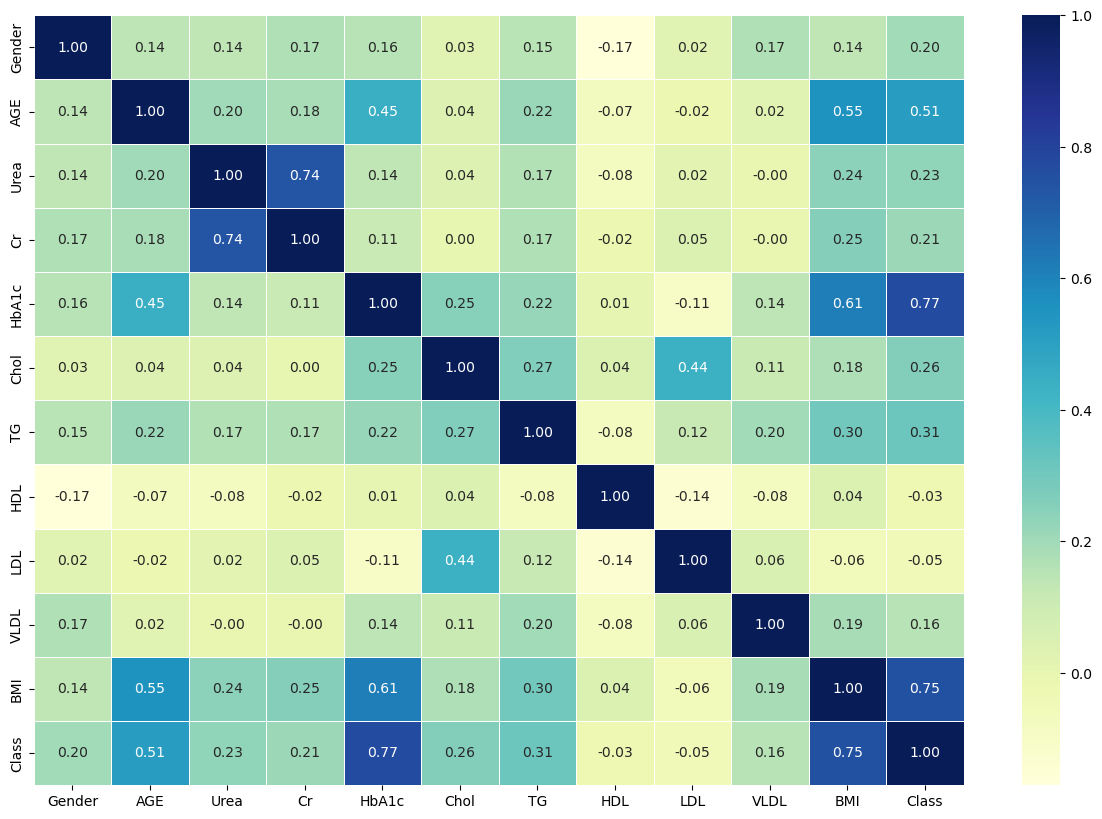

In [16]:
corr_matrix = data.corr()
figure, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = '.2f', cmap ='YlGnBu')
plt.show();

In [17]:
x = data.drop("Class", axis =1)
y = data["Class"]

In [18]:
x

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0
...,...,...,...,...,...,...,...,...,...,...,...
259,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,30.0
260,0,61,24.0,401,7.0,4.3,2.9,0.4,2.7,1.3,36.6
261,1,60,20.8,800,9.0,2.3,1.1,0.9,0.9,0.5,33.0
262,1,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
259    2
260    2
261    2
262    2
263    2
Name: Class, Length: 264, dtype: int64

In [20]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2)


In [21]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
144,0,56,1.9,20,11.7,5.5,5.3,0.90,1.30,1.2,33.0
73,0,50,6.0,61,5.0,4.4,2.7,1.30,3.10,1.1,21.0
78,1,36,3.3,70,4.2,4.9,2.5,0.90,1.90,0.7,20.0
252,1,55,26.4,228,7.1,4.1,1.9,1.30,2.00,0.9,27.0
182,1,60,5.0,55,10.0,4.5,1.3,0.90,3.00,0.6,33.0
...,...,...,...,...,...,...,...,...,...,...,...
20,1,50,4.0,28,5.3,4.8,1.0,0.90,3.60,0.4,23.0
188,0,69,6.1,49,8.2,8.0,4.8,1.30,4.80,2.2,34.0
71,1,51,4.5,88,4.0,4.1,1.5,0.90,2.70,1.1,20.0
106,0,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,21.0


In [22]:
y_train, len(y_train)

(144    2
 73     0
 78     0
 252    2
 182    2
       ..
 20     0
 188    2
 71     0
 106    1
 102    1
 Name: Class, Length: 211, dtype: int64,
 211)

In [23]:
models = {"loistic_regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "random_forest": RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    # Make a Dict to keep model scores
    model_scores = {}
    #Loop through the model
    for name, model in models.items():
        #fit the model to data
        model.fit(x_train, y_train)
        # Evaluate the model and append the score to model_score
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'loistic_regression': 0.7547169811320755,
 'KNN': 0.8679245283018868,
 'random_forest': 1.0}

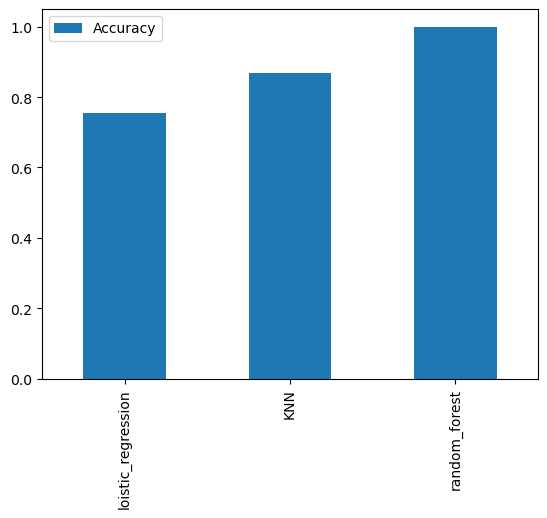

In [25]:
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar()
plt.show();

In [26]:
# Tuning KNN

train_scores = []
test_scores = []

# Set a range of different values for k (neighbors)
neighbors = range(1, 21)

# Loop through different values of k
for i in neighbors:
    # Set up the KNN model with current k
    KNN = KNeighborsClassifier(n_neighbors=i)

    # Fit the model
    KNN.fit(x_train, y_train)

    # Append the accuracy scores
    train_scores.append(KNN.score(x_train, y_train))
    test_scores.append(KNN.score(x_test, y_test))

In [27]:
train_scores

[1.0,
 0.8862559241706162,
 0.8957345971563981,
 0.8388625592417062,
 0.8056872037914692,
 0.7867298578199052,
 0.7867298578199052,
 0.7867298578199052,
 0.7867298578199052,
 0.7725118483412322,
 0.7867298578199052,
 0.7725118483412322,
 0.7772511848341233,
 0.7677725118483413,
 0.7677725118483413,
 0.7677725118483413,
 0.7630331753554502,
 0.7582938388625592,
 0.7630331753554502,
 0.7630331753554502]

In [28]:
test_scores

[0.7924528301886793,
 0.8490566037735849,
 0.8490566037735849,
 0.8301886792452831,
 0.8679245283018868,
 0.8301886792452831,
 0.8490566037735849,
 0.8490566037735849,
 0.8301886792452831,
 0.7924528301886793,
 0.7924528301886793,
 0.7735849056603774,
 0.7547169811320755,
 0.7735849056603774,
 0.7735849056603774,
 0.7735849056603774,
 0.7924528301886793,
 0.7547169811320755,
 0.7547169811320755,
 0.7735849056603774]

Maximum KNN score on the test data: 86.79%


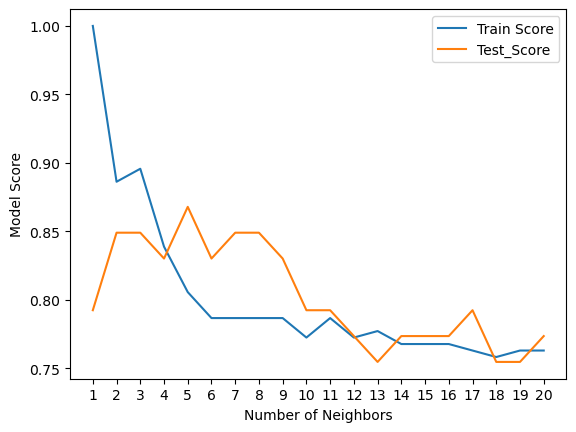

In [29]:
plt.plot(neighbors, train_scores, label = ["Train Score"])
plt.plot(neighbors, test_scores, label = ["Test_Score"])
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100 :.2f}%")
plt.show();

In [30]:
# Create a Hyperparameter grid for logistic Regression

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a Hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3 ,5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
          }

In [31]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions = log_reg_grid,
                                 cv = 5,
                                 n_iter = 20,
                                 verbose = True)

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use 

,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(78.47599703514607)}

In [33]:
rs_log_reg.score(x_test, y_test)

0.8679245283018868

In [ ]:
np.random.seed(42)

rf_reg = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions = rf_grid,
                                 cv = 5,
                                 n_iter = 20,
                                 verbose = True)

rf_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rf_reg.best_params_

In [ ]:
rf_reg.score(x_test, y_test)

In [ ]:
# Create a Hyperparameter grid for logistic Regression

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose = True)

gs_log_reg.fit(x_train, y_train)

In [ ]:
gs_log_reg.best_params_

In [ ]:
gs_log_reg.score(x_test, y_test)

In [ ]:
y_preds = gs_log_reg.predict(x_test)

In [ ]:
y_preds

In [ ]:
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
np.random.seed(42)

rf_reg = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions = rf_grid,
                                 cv = 5,
                                 n_iter = 20,
                                 verbose = True)

rf_reg.fit(x_train, y_train)

In [ ]:
rf_reg.best_params_

In [ ]:
rf_reg.score(x_test, y_test)

In [ ]:
y_preds = rf_reg.predict(x_test)

In [ ]:
y_preds

In [ ]:
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
rf_reg.best_params_

In [ ]:
clf = RandomForestClassifier(n_estimators = 710, min_samples_split = 16, min_samples_leaf = 3, max_depth = 10 )

In [ ]:
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring = "accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
cv_pre = cross_val_score(clf, x, y, cv = 5, scoring = "precision_macro")

cv_pre = np.mean(cv_pre)
cv_pre

In [ ]:
cv_recall = cross_val_score(clf, x, y, cv = 5, scoring = "recall_macro")

cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
cv_f1 = cross_val_score(clf, x, y, cv = 5, scoring = "f1_macro")

cv_f1 = np.mean(cv_f1)
cv_f1

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_pre,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);
plt.show();

In [ ]:
clf.fit(x_train, y_train);
# Check
clf.feature_importances_

In [ ]:
features_dict = dict(zip(data.columns[:-1], clf.feature_importances_))

# Display the dictionary
features_dict

In [ ]:
features_data = pd.DataFrame(features_dict, index=[0])
features_data.T.plot.bar(title="Feature Importance", legend=False)
plt.show();

In [ ]:
import joblib
joblib.dump(rf_reg, 'best_diabetes_rf_model.pkl')